In [1]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from scipy import optimize
import xarray as xr
import os
from scipy.signal import savgol_filter
from io import StringIO
from os.path import isfile, join

# Superconducting Data Fitting

## V-I curve at different Temperature 


In [2]:
Data=pd.DataFrame()
filename='NbSe2-SV05-dVdI-I_1uA_-_S2-S7_-TSeq-0.dat'
df=pd.read_csv(str(filename),skiprows=0)
df.head()

,B (T),T(mK),VOLT,V (V),Current,2 Terminal dV/dI,Y (V),R (V),Phase (Deg),Quasi 4 Terminal dV/dI,Y (V).1,R (V).1,Phase (Deg).1,Voltage
0,-0.00002,3.745,-17.00,-17.00146,-0.000168,-0.001018,0.000000e+00,0.000981,0.036,0.0,0.0,0.0,0.0,-0.001762
1,-0.00002,3.748,-16.99,-16.99148,-0.000168,-0.001018,0.000000e+00,0.000981,0.036,0.0,0.0,0.0,0.0,-0.001762
2,-0.00002,3.748,-16.98,-16.98149,-0.000168,-0.001017,0.000000e+00,0.000983,0.036,0.0,0.0,0.0,0.0,-0.001760
3,-0.00002,3.748,-16.97,-16.97153,-0.000168,-0.001018,1.907360e-06,0.000982,0.114,0.0,0.0,0.0,0.0,-0.001760
4,-0.00002,3.745,-16.96,-16.96154,-0.000168,-0.001017,9.536820e-07,0.000983,0.078,0.0,0.0,0.0,0.0,-0.001758


In [3]:
def modifydata(dd):
    dd = dd.dropna()
    cc = pd.DataFrame()
    cc = pd.concat( [ dd.iloc[:,4], dd.iloc[:,13]],
                    axis='columns', keys=['I', 'V1' ])
    ##possible furture action to deal with data    
    return cc


frame = []
T = []

## make recursion of all files in the dic
currentdic=os.listdir('.')
currentdic=currentdic[1:-1]

for i in currentdic:
    dataname=i
    df=pd.read_csv(dataname,skiprows=0)
    cc = modifydata(df)
    frame.append(cc)
    T.append( np.around( np.mean( df.iloc[:,1] ), decimals=5 ) )
    
exdata = pd.concat(frame, keys=T, names=[ 'T'])

I = exdata['I']
V1 = exdata['V1']

exdata


I        V1
T                               
3.75002 0    -0.000168 -0.001762
        1    -0.000168 -0.001762
        2    -0.000168 -0.001760
        3    -0.000168 -0.001760
        4    -0.000168 -0.001758
        5    -0.000168 -0.001758
        6    -0.000168 -0.001755
        7    -0.000167 -0.001755
        8    -0.000167 -0.001754
        9    -0.000167 -0.001752
        10   -0.000167 -0.001750
        11   -0.000167 -0.001750
        12   -0.000167 -0.001748
        13   -0.000167 -0.001748
        14   -0.000167 -0.001748
        15   -0.000167 -0.001746
        16   -0.000167 -0.001746
        17   -0.000166 -0.001743
        18   -0.000166 -0.001741
        19   -0.000166 -0.001741
        20   -0.000166 -0.001740
        21   -0.000166 -0.001740
        22   -0.000166 -0.001738
        23   -0.000166 -0.001738
        24   -0.000166 -0.001736
        25   -0.000166 -0.001734
        26   -0.000166 -0.001733
        27   -0.000165 -0.001734
        28   -0.000165 -0.001732
        29   -0.000165 -0.001732
...                ...       ...
5.50021 1671 -0.000162 -0.001702
        1672 -0.000163 -0.001704
        1673 -0.000163 -0.001707
        1674 -0.000163 -0.001709
        1675 -0.000163 -0.001711
        1676 -0.000163 -0.001714
        1677 -0.000164 -0.001714
        1678 -0.000164 -0.001717
        1679 -0.000164 -0.001721
        1680 -0.000164 -0.001722
        1681 -0.000164 -0.001725
        1682 -0.000165 -0.001725
        1683 -0.000165 -0.001728
        1684 -0.000165 -0.001730
        1685 -0.000165 -0.001734
        1686 -0.000165 -0.001735
        1687 -0.000166 -0.001738
        1688 -0.000166 -0.001740
        1689 -0.000166 -0.001740
        1690 -0.000166 -0.001744
        1691 -0.000166 -0.001744
        1692 -0.000167 -0.001748
        1693 -0.000167 -0.001751
        1694 -0.000167 -0.001751
        1695 -0.000167 -0.001755
        1696 -0.000167 -0.001755
        1697 -0.000168 -0.001757
        1698 -0.000168 -0.001761
        1699 -0.000168 -0.001761
        1700 -0.000168 -0.001764

[57795 rows x 2 columns]

<IPython.core.display.Javascript object>


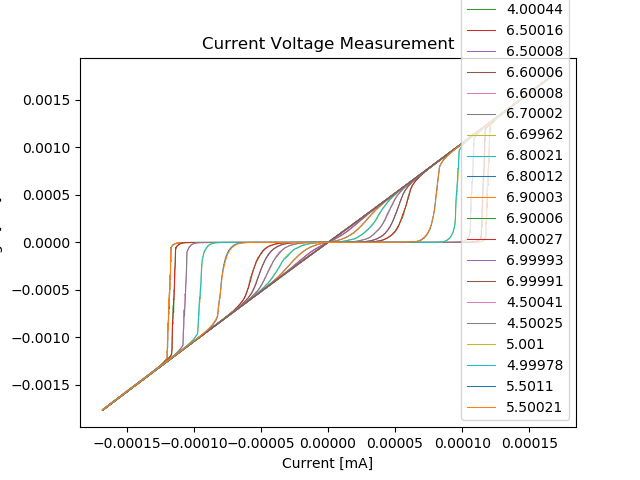

Text(0.5,1,'Current Voltage Measurement')

In [4]:
fig, ax = plt.subplots()

for i in range(0,len(T),1):
    Ii=I[T[i]].tolist()
    Vi=V1[T[i]].tolist()
    ax.plot( Ii , Vi , label=T[i], linestyle='solid',linewidth=0.75)

#default plotting method could not give a precise graph
    
plt.legend(title='T (K)', loc='lower right')
plt.ylabel('Voltage [m$V$]')
plt.xlabel('Current [mA]')
plt.title('Current Voltage Measurement')

### For further calculation, we keep only the values larger than 0

In [5]:
exdata = exdata[~(exdata['V1']<=0)]
exdata = exdata[~(exdata['I']<=0)]

exdata.loc[:,'logV'] = np.log10(exdata.loc[:,'V1'])
exdata.loc[:,'logI'] = np.log10(exdata.loc[:,'I'])

exdata

I            V1      logV      logI
T                                                           
3.75002 1701  8.191918e-08  4.018904e-08 -7.395892 -7.086614
        1702  1.649422e-07  3.837537e-08 -7.415947 -6.782668
        1703  2.811999e-07  3.392180e-08 -7.469521 -6.550985
        1704  3.696559e-07  3.148345e-08 -7.501918 -6.432202
        1705  4.607859e-07  3.001239e-08 -7.522699 -6.336501
        1706  5.795052e-07  2.805768e-08 -7.551948 -6.236943
        1707  6.792947e-07  2.690906e-08 -7.570102 -6.167942
        1708  7.612135e-07  2.723152e-08 -7.564928 -6.118494
        1709  8.610873e-07  2.717106e-08 -7.565893 -6.064953
        1710  9.561226e-07  2.586120e-08 -7.587351 -6.019486
        1711  1.065164e-06  2.702999e-08 -7.568154 -5.972584
        1712  1.159945e-06  3.095959e-08 -7.509205 -5.935563
        1713  1.269199e-06  3.444583e-08 -7.462863 -5.896470
        1714  1.356212e-06  4.093471e-08 -7.387908 -5.867672
        1715  1.454345e-06  4.968059e-08 -7.303813 -5.837333
        1716  1.567292e-06  5.316687e-08 -7.274359 -5.804850
        1717  1.648745e-06  5.020457e-08 -7.299257 -5.782847
        1718  1.747047e-06  4.980153e-08 -7.302757 -5.757695
        1719  1.867380e-06  4.506583e-08 -7.346153 -5.728767
        1720  1.968358e-06  3.712598e-08 -7.430322 -5.705896
        1721  2.043188e-06  3.273285e-08 -7.485016 -5.689692
        1722  2.158087e-06  3.402252e-08 -7.468233 -5.665931
        1723  2.264838e-06  3.448599e-08 -7.462357 -5.644963
        1724  2.353081e-06  3.601750e-08 -7.443486 -5.628363
        1725  2.453295e-06  4.061211e-08 -7.391344 -5.610250
        1726  2.558899e-06  4.601278e-08 -7.337122 -5.591947
        1727  2.636701e-06  5.564538e-08 -7.254571 -5.578939
        1728  2.753681e-06  6.364569e-08 -7.196231 -5.560086
        1729  2.836152e-06  7.422541e-08 -7.129447 -5.547270
        1730  2.953980e-06  7.888048e-08 -7.103030 -5.529592
...                    ...           ...       ...       ...
5.50021 820   5.918660e-06  8.299560e-08 -7.080945 -5.227777
        821   5.725620e-06  8.448688e-08 -7.073211 -5.242177
        822   5.517855e-06  8.763063e-08 -7.057344 -5.258230
        823   5.305590e-06  8.962573e-08 -7.047567 -5.275266
        824   5.118072e-06  9.420025e-08 -7.025948 -5.290894
        825   4.932713e-06  9.345466e-08 -7.029399 -5.306914
        826   4.711321e-06  9.591324e-08 -7.018121 -5.326857
        827   4.518242e-06  9.643720e-08 -7.015755 -5.345031
        828   4.337976e-06  9.734405e-08 -7.011691 -5.362713
        829   4.125032e-06  9.821059e-08 -7.007842 -5.384573
        830   3.923929e-06  9.843224e-08 -7.006863 -5.406279
        831   3.742267e-06  9.915768e-08 -7.003674 -5.426865
        832   3.523419e-06  9.970178e-08 -7.001297 -5.453036
        833   3.340228e-06  1.028455e-07 -6.987815 -5.476224
        834   3.128260e-06  1.038127e-07 -6.983749 -5.504697
        835   2.930679e-06  1.045180e-07 -6.980809 -5.533032
        836   2.743923e-06  1.088103e-07 -6.963330 -5.561628
        837   2.551478e-06  1.105232e-07 -6.956547 -5.593208
        838   2.358013e-06  1.133848e-07 -6.945445 -5.627454
        839   2.161538e-06  1.095156e-07 -6.960524 -5.665237
        840   1.939084e-06  1.151380e-07 -6.938781 -5.712403
        841   1.741929e-06  1.094551e-07 -6.960764 -5.758970
        842   1.558653e-06  1.082057e-07 -6.965750 -5.807251
        843   1.353858e-06  1.031879e-07 -6.986371 -5.868427
        844   1.159927e-06  1.053442e-07 -6.977389 -5.935569
        845   9.518632e-07  1.023416e-07 -6.989948 -6.021425
        846   7.515240e-07  1.051024e-07 -6.978387 -6.124057
        847   5.547078e-07  1.045381e-07 -6.980725 -6.255936
        848   3.760158e-07  1.062914e-07 -6.973502 -6.424794
        849   1.743183e-07  1.041552e-07 -6.982319 -6.758657

[27745 rows x 4 columns]

<IPython.core.display.Javascript object>


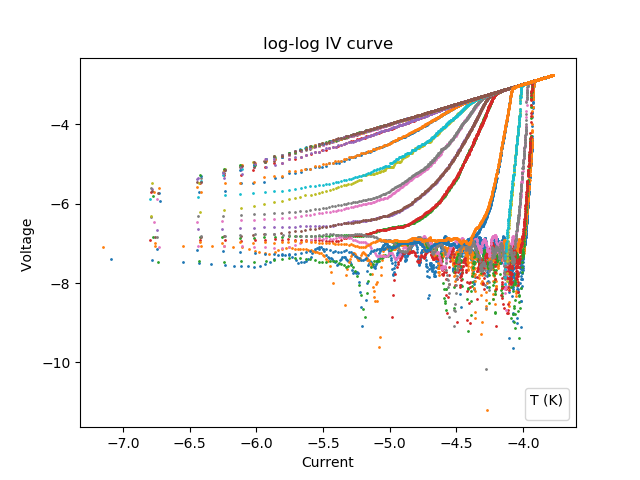

No handles with labels found to put in legend.


Text(0.5,1,'log-log IV curve')

In [7]:
fig, ax = plt.subplots()

logV = exdata['logV']
logI = exdata['logI']

for i in range(0,len(T),1):
    ax.scatter( logI[T[i]].tolist() , logV[T[i]].tolist() ,  s=1)

#default plotting method could not give a precise graph
    
plt.legend(title='T (K)', loc='lower right')
plt.ylabel('Voltage ')
plt.xlabel('Current')
plt.title('log-log IV curve')




## General idea to find gradient equals to 3

1. Smooth the curve.

    -Another idea: Delete data below some certain values
   
   -Reason to do this: these values are small and with error
     

 2. Calculate the gradient for each small intervals, save them as an array.


 3. Find outliers and kick out
     
     At here, it is required to take gradient of the small temperature region
     
     Idea: Smooth curve first than delete gradient less than 1
 
 
 4. Get the gradient-temperature relation
 
 
 5. Find corresponding Temperature

<IPython.core.display.Javascript object>


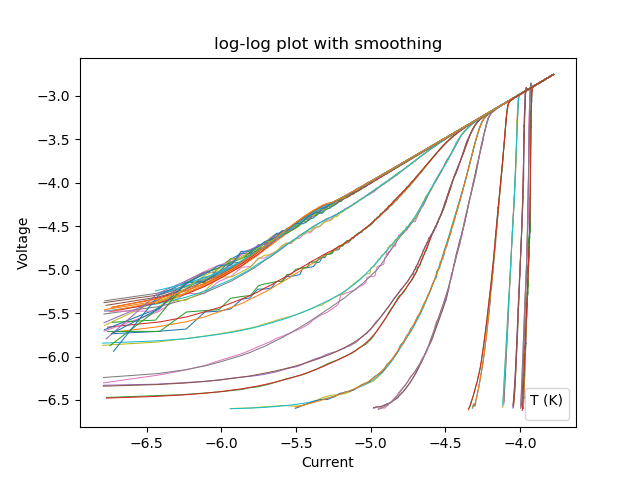

D:\anaconda\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
No handles with labels found to put in legend.


Text(0.5,1,'log-log plot with smoothing')

In [8]:
sectiondata = exdata[~(exdata['logV']<=-6.6 )]
#exdata = exdata[~(exdata['logV']>=-10.0)]

fig, ax = plt.subplots()

logV = sectiondata['logV']
logI = sectiondata['logI']

def smoothcurve(y):
    yy = savgol_filter(y, 51, 3)
    return yy
    

for i in range(0,len(T),1):
    ax.plot( logI[T[i]].tolist() , logV[T[i]].tolist() , linewidth=0.75)
    logVi = logV[T[i]].tolist()
    logV_smooth = smoothcurve(logVi)
    ax.plot( logI[T[i]].tolist() , logV_smooth ,linewidth=0.75)

#default plotting method could not give a precise graph


plt.legend(title='T (K)', loc='lower right')
plt.ylabel('Voltage')
plt.xlabel('Current')
plt.title('log-log plot with smoothing')




In [9]:
def smoothcurve(y):
    yy = savgol_filter(y, 51, 3)
    return yy

def gradient(x, y):
    grad_array = []
    for i in range(1, len(x)-1, 1):
        grad = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
        grad_array.append(grad)
        
    grad_array.insert(0, grad_array[0])
    grad_array.append(grad_array[-1])
    return grad_array

sectiondata = exdata[~(exdata['logV']<=-6.6 )]

logV = sectiondata['logV']
logI = sectiondata['logI']

fittingdf = pd.DataFrame()
frame = []

for i in range(0, len(T), 1):
    cc = pd.DataFrame()
    logIi = logI[T[i]].tolist()
    logVi = logV[T[i]].tolist()
    logVi_smooth = smoothcurve(logVi)
    grad = gradient(logIi, logVi_smooth)
    
    cc['logI'] = logIi
    cc['logV'] = logVi
    cc['logV_smooth'] = logVi_smooth
    cc['grad'] = grad
    
    cc = cc[~(cc['grad']<= 0.96 )]
    frame.append(cc)

fittingdf = pd.concat(frame, keys=T, names=[ 'T'])

fittingdf



D:\anaconda\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


logI      logV  logV_smooth       grad
T                                                      
3.75002 0   -3.975791 -6.598452    -6.579695  32.302627
        1   -3.975295 -6.554414    -6.565310  32.302627
        2   -3.974890 -6.542013    -6.550575  41.410318
        3   -3.974575 -6.498038    -6.535501  37.702404
        4   -3.974082 -6.491068    -6.520097  34.910316
        5   -3.973683 -6.484770    -6.504375  43.419252
        6   -3.973350 -6.488527    -6.488343  44.638789
        7   -3.972958 -6.468022    -6.472014  37.365134
        8   -3.972469 -6.477956    -6.455396  37.831243
        9   -3.972073 -6.458008    -6.438501  43.108166
        10  -3.971678 -6.440116    -6.421338  46.981969
        11  -3.971336 -6.420758    -6.403919  44.468220
        12  -3.970889 -6.410053    -6.386252  44.634076
        13  -3.970540 -6.393434    -6.368348  47.334524
        14  -3.970128 -6.389447    -6.350218  43.973289
        15  -3.969710 -6.374246    -6.331873  43.796837
        16  -3.969286 -6.342379    -6.313321  44.508144
        17  -3.968872 -6.306142    -6.294574  50.296090
        18  -3.968537 -6.277263    -6.275641  45.633847
        19  -3.968038 -6.240744    -6.256534  45.137294
        20  -3.967686 -6.204656    -6.237262  54.756954
        21  -3.967332 -6.191360    -6.217836  51.305547
        22  -3.966926 -6.175801    -6.198266  49.211948
        23  -3.966534 -6.159401    -6.178561  46.865338
        24  -3.966083 -6.125139    -6.158734  45.962942
        25  -3.965668 -6.121303    -6.138793  50.248300
        26  -3.965356 -6.093622    -6.122193  46.635638
        27  -3.964906 -6.088957    -6.103230  44.827324
        28  -3.964479 -6.065702    -6.082884  51.571879
        29  -3.964080 -6.068552    -6.060651  62.299264
...               ...       ...          ...        ...
5.50021 592 -4.292218 -6.322282    -6.330099   6.176730
        593 -4.293849 -6.333321    -6.340737   6.464321
        594 -4.295519 -6.344127    -6.351436   6.382998
        595 -4.297227 -6.353664    -6.362298   6.479030
        596 -4.298893 -6.367332    -6.373293   6.443064
        597 -4.300605 -6.380247    -6.384061   6.243620
        598 -4.302326 -6.392345    -6.394729   6.167551
        599 -4.304048 -6.400235    -6.405295   5.761113
        600 -4.305976 -6.412505    -6.415759   5.944796
        601 -4.307551 -6.425807    -6.426123   5.941491
        602 -4.309448 -6.438928    -6.436384   5.604184
        603 -4.311195 -6.446740    -6.446544   5.960706
        604 -4.312839 -6.459182    -6.456601   5.588471
        605 -4.314776 -6.467422    -6.466556   5.415088
        606 -4.316497 -6.479397    -6.476409   5.709307
        607 -4.318210 -6.487522    -6.486159   5.529153
        608 -4.320005 -6.497451    -6.495806   5.186446
        609 -4.321910 -6.498691    -6.505349   5.144837
        610 -4.323695 -6.512084    -6.514790   5.381834
        611 -4.325399 -6.521345    -6.524126   5.086261
        612 -4.327346 -6.530333    -6.533359   5.054274
        613 -4.329032 -6.545862    -6.542488   5.239402
        614 -4.330811 -6.565396    -6.551512   4.701058
        615 -4.332849 -6.573188    -6.560432   4.722472
        616 -4.334566 -6.577500    -6.569248   4.667834
        617 -4.336603 -6.584033    -6.577959   4.634952
        618 -4.338302 -6.587100    -6.586564   4.581853
        619 -4.340337 -6.593300    -6.595064   4.391974
        620 -4.342149 -6.593815    -6.603459   4.458920
        621 -4.344079 -6.599903    -6.611748   4.458920

[21709 rows x 4 columns]

<IPython.core.display.Javascript object>


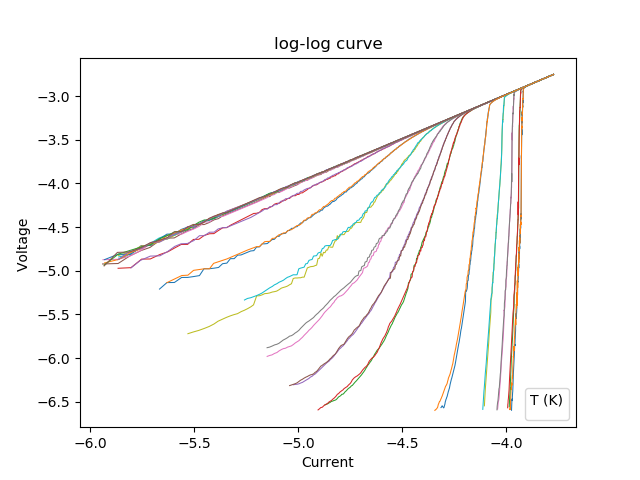

No handles with labels found to put in legend.


Text(0.5,1,'log-log curve')

In [10]:
fig, ax = plt.subplots()

logV = fittingdf['logV']
logI = fittingdf['logI']


for i in range(0,len(T),1):
    ax.plot( logI[T[i]].tolist() , logV[T[i]].tolist() , linewidth=0.75)

#default plotting method could not give a precise graph


plt.legend(title='T (K)', loc='lower right')
plt.ylabel('Voltage ')
plt.xlabel('Current')
plt.title('log-log curve')

<IPython.core.display.Javascript object>


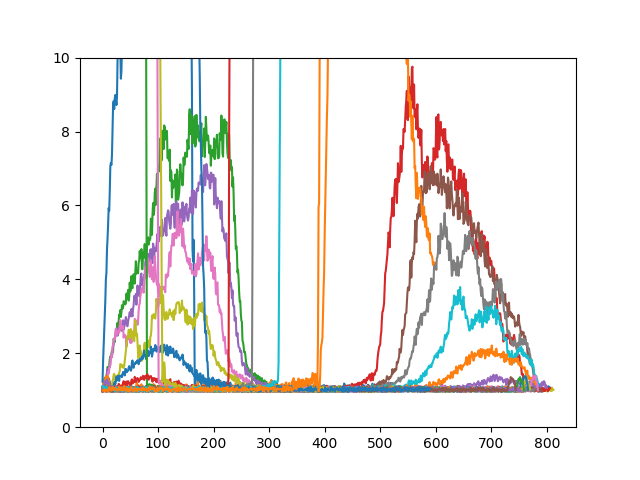

3.75002
3.75
6.00128
6.00026
6.10009
6.10047
6.20024
6.2003
6.29977
6.2997
6.40024
6.39998
4.00044
6.50016
6.50008
6.60006
6.60008
6.70002
6.69962
6.80021
6.80012
6.90003
6.90006
4.00027
6.99993
6.99991
4.50041
4.50025
5.001
4.99978
5.5011
5.50021


(0, 10)

In [11]:

##remove outliers:

def outliers(lst):
    mean = np.mean(lst, axis=0)
    sd = np.std(lst, axis=0)
    
    final_list = [x for x in lst if (x > mean - 2 * sd)]
    final_list = [x for x in final_list if (x < mean + 2 * sd)]
    
    return final_list


fig, ax = plt.subplots()


for i in range(0,len(T),1):
    grad = fittingdf['grad'][T[i]]
    ax.plot( np.arange(0, len(grad)) , grad)
    print(T[i])





plt.ylim(0,10)


[3.75002, 6.00128, 6.10009, 6.20024, 6.29977, 6.40024, 4.00044, 6.50016, 6.60006, 6.70002, 6.69962, 6.80021, 6.90003, 6.90006, 6.99993, 6.99991, 4.50041, 5.001, 5.5011]
[46.84747123762943, 3.6716477718961933, 3.1627744277097793, 2.851603574070781, 1.9837083846688208, 1.5784731558754803, 49.073529267420305, 1.2122882314980046, 1.0613949316410722, 1.0383348315247212, 1.022002949894002, 1.0360405166694753, 1.0441393977226605, 1.019804862023608, 1.0342830320693193, 1.0235227162535265, 43.55353944750358, 35.69944883599201, 12.707115364452129]


<IPython.core.display.Javascript object>


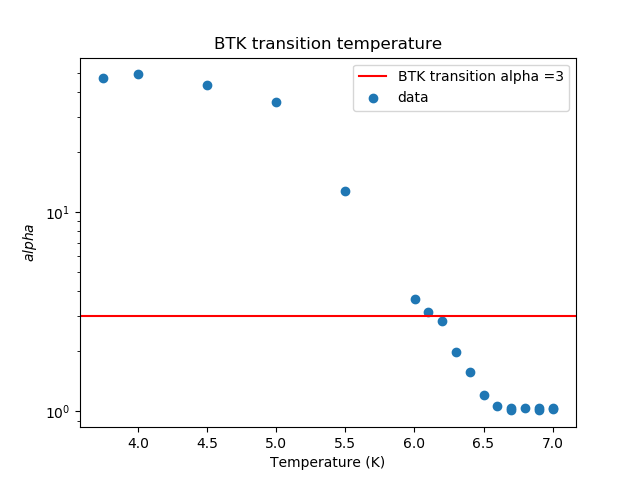

Text(0.5,1,'BTK transition temperature')

In [21]:
average_grad = []

for i in range(0, len(T), 1):
    grad = fittingdf['grad'][T[i]]
    average_grad_i = np.average(grad[:100])
    average_grad.append(average_grad_i)

print(T)
print(average_grad)

T = [3.75002, 6.00128,  6.10009, 
      6.20024,  6.29977, 
     6.40024,  4.00044, 6.50016,  
     6.60006,  6.70002, 6.69962, 6.80021, 
      6.90003, 6.90006,  6.99993, 
     6.99991, 4.50041,  5.001,  
     5.5011]

average_grad = [46.84747123762943,  3.6716477718961933,  3.1627744277097793, 
                 2.851603574070781,  1.9837083846688208,  
                1.5784731558754803,  49.073529267420305, 1.2122882314980046,  
                1.0613949316410722,  1.0383348315247212, 1.022002949894002, 1.0360405166694753, 
                 1.0441393977226605, 1.019804862023608,  1.0342830320693193, 
                1.0235227162535265, 43.55353944750358,  35.69944883599201,  
                12.707115364452129]
    

fig, ax = plt.subplots()

ax.scatter( T , average_grad, label = 'data')
plt.axhline(y=3, color='r', linestyle='-', label='BTK transition alpha =3')

ax.set_yscale('log')

plt.xlabel('Temperature (K)')
plt.ylabel('$alpha$')
plt.legend( loc='upper right')

plt.title('BTK transition temperature')



<IPython.core.display.Javascript object>


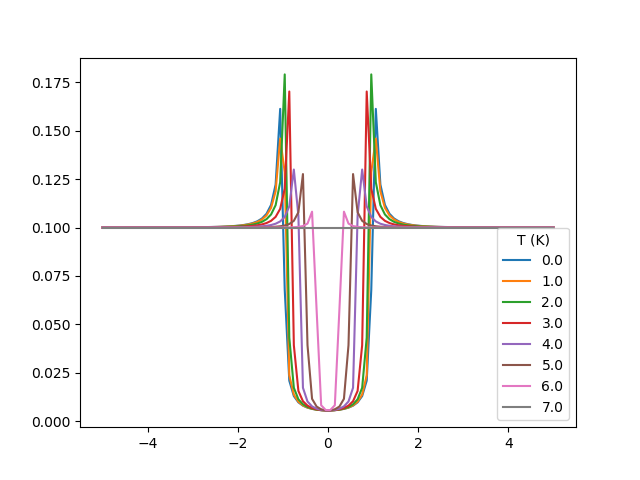

D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


In [13]:

Tc0 = 7

Tseq = np.arange(8.0)
chep = 0

def BTK(Del0, Z, V, T):
    E = np.abs(V) 
    fermi = 1 / (1 + np.exp(-(E - chep)/( 25.7*10**(-3)/300* T)))
    Del = Del0 * (1 - (T/ Tc0)**2)
    miu0 = 1/2 * (1 + np.sqrt(E**2 - Del**2)/E )
    v0 = 1/2 * (1 - np.sqrt(E**2 - Del**2)/E )
    gamma = miu0**2 + (miu0**2 - v0**2)*Z**2
    
    if E > Del:
        A = miu0**2 * v0**2 / gamma ** 2
        B = (miu0**2 - v0**2)**2 * (Z**4 + Z**2)/ gamma**2
    else:
        A = Del**2/ (E**2 + (Del**2 - E**2) * (1 + 2* Z**2)**2)
        B = 1 - A
    return fermi*(1 + A - B)


fig, ax = plt.subplots()

for i in Tseq:
    Efine=np.linspace(-5,5,100)
    ax.plot(Efine, list(map(lambda x: BTK(1, 3, x, i), Efine)) , label = i )

plt.legend(title='T (K)', loc='lower right')



<IPython.core.display.Javascript object>


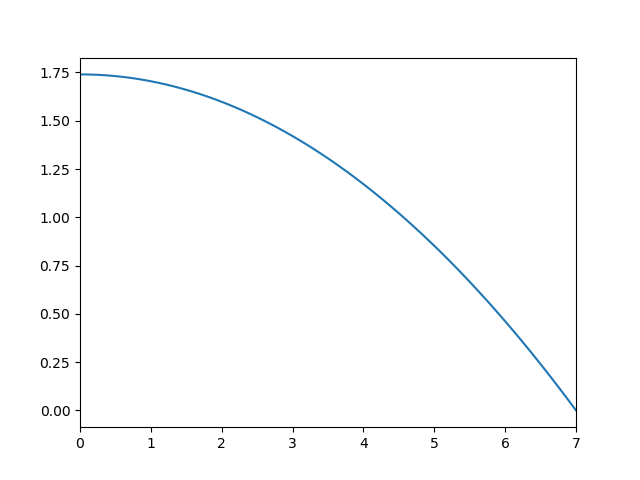

(0, 7)

In [14]:


Tc0 = 7


def BCS( T):
    return  1.74 * (1 - (T/ Tc0)**2)


fig, ax = plt.subplots()
Tfine=np.linspace(0,7,100)

ax.plot(Tfine, list(map(lambda x: BCS( x), Tfine)) )
plt.xlim(0,7)

